# Preparation

In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

# change working diretory
# import os
# os.chdir("/content/gdrive/MyDrive/Dissertation/")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [10]:
!ls runs/detect
# %cd drive/MyDrive/Dissertation

train


Make sure GPU work fine.

In [11]:
!nvidia-smi

Thu Aug  3 20:33:01 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    12W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Make sure we are in the right working directory.

In [12]:
import os
HOME = os.getcwd()
print(HOME)

/content


Install YOLOv8.

In [13]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 25.5 GB RAM, 24.6/166.8 GB disk)


In [14]:
from ultralytics import YOLO

from IPython.display import display, Image

# Training on the original dataset

Download the dataset.

Train:Val:Test = 6:2:2

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="lOVTQ88BgSlHqrup7AYi")
project = rf.workspace("dissertation-bqltf").project("minneapple-floor")
dataset = project.version(1).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 50.3 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`


Extracting Dataset Version Zip to MinneApple-floor-1 in yolov8:: 100%|██████████| 32/32 [00:00<00:00, 2885.35it/s]


## Train the model

The training ends at 188th epoch as no improvement.

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=300 imgsz=720 plots=True  # 300


/content
100% 21.5M/21.5M [00:00<00:00, 72.9MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/MinneApple-floor-1/data.yaml, epochs=300, patience=50, batch=16, imgsz=720, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, ke

In [ ]:
!ls {HOME}/runs/detect/train/  # check the model is prodeced

args.yaml					    train_batch0.jpg
events.out.tfevents.1691053967.23ad01fec986.3141.0  train_batch1.jpg
results.csv					    train_batch2.jpg
results.png					    weights


In [ ]:
%cp {HOME}/runs/detect/train/weights/best.pt /content/gdrive/My\ Drive/Dissertation/Models
%cp {HOME}/runs/detect/train/results.png /content/gdrive/My\ Drive/Dissertation/Models
%cp {HOME}/runs/detect/train/confusion_matrix.png /content/gdrive/My\ Drive/Dissertation/Models
%cp {HOME}/runs/detect/train/val_batch0_pred.jpg /content/gdrive/My\ Drive/Dissertation/Models


cp: cannot stat '/content/runs/detect/train/confusion_matrix.png': No such file or directory
cp: cannot stat '/content/runs/detect/train/val_batch0_pred.jpg': No such file or directory


/content


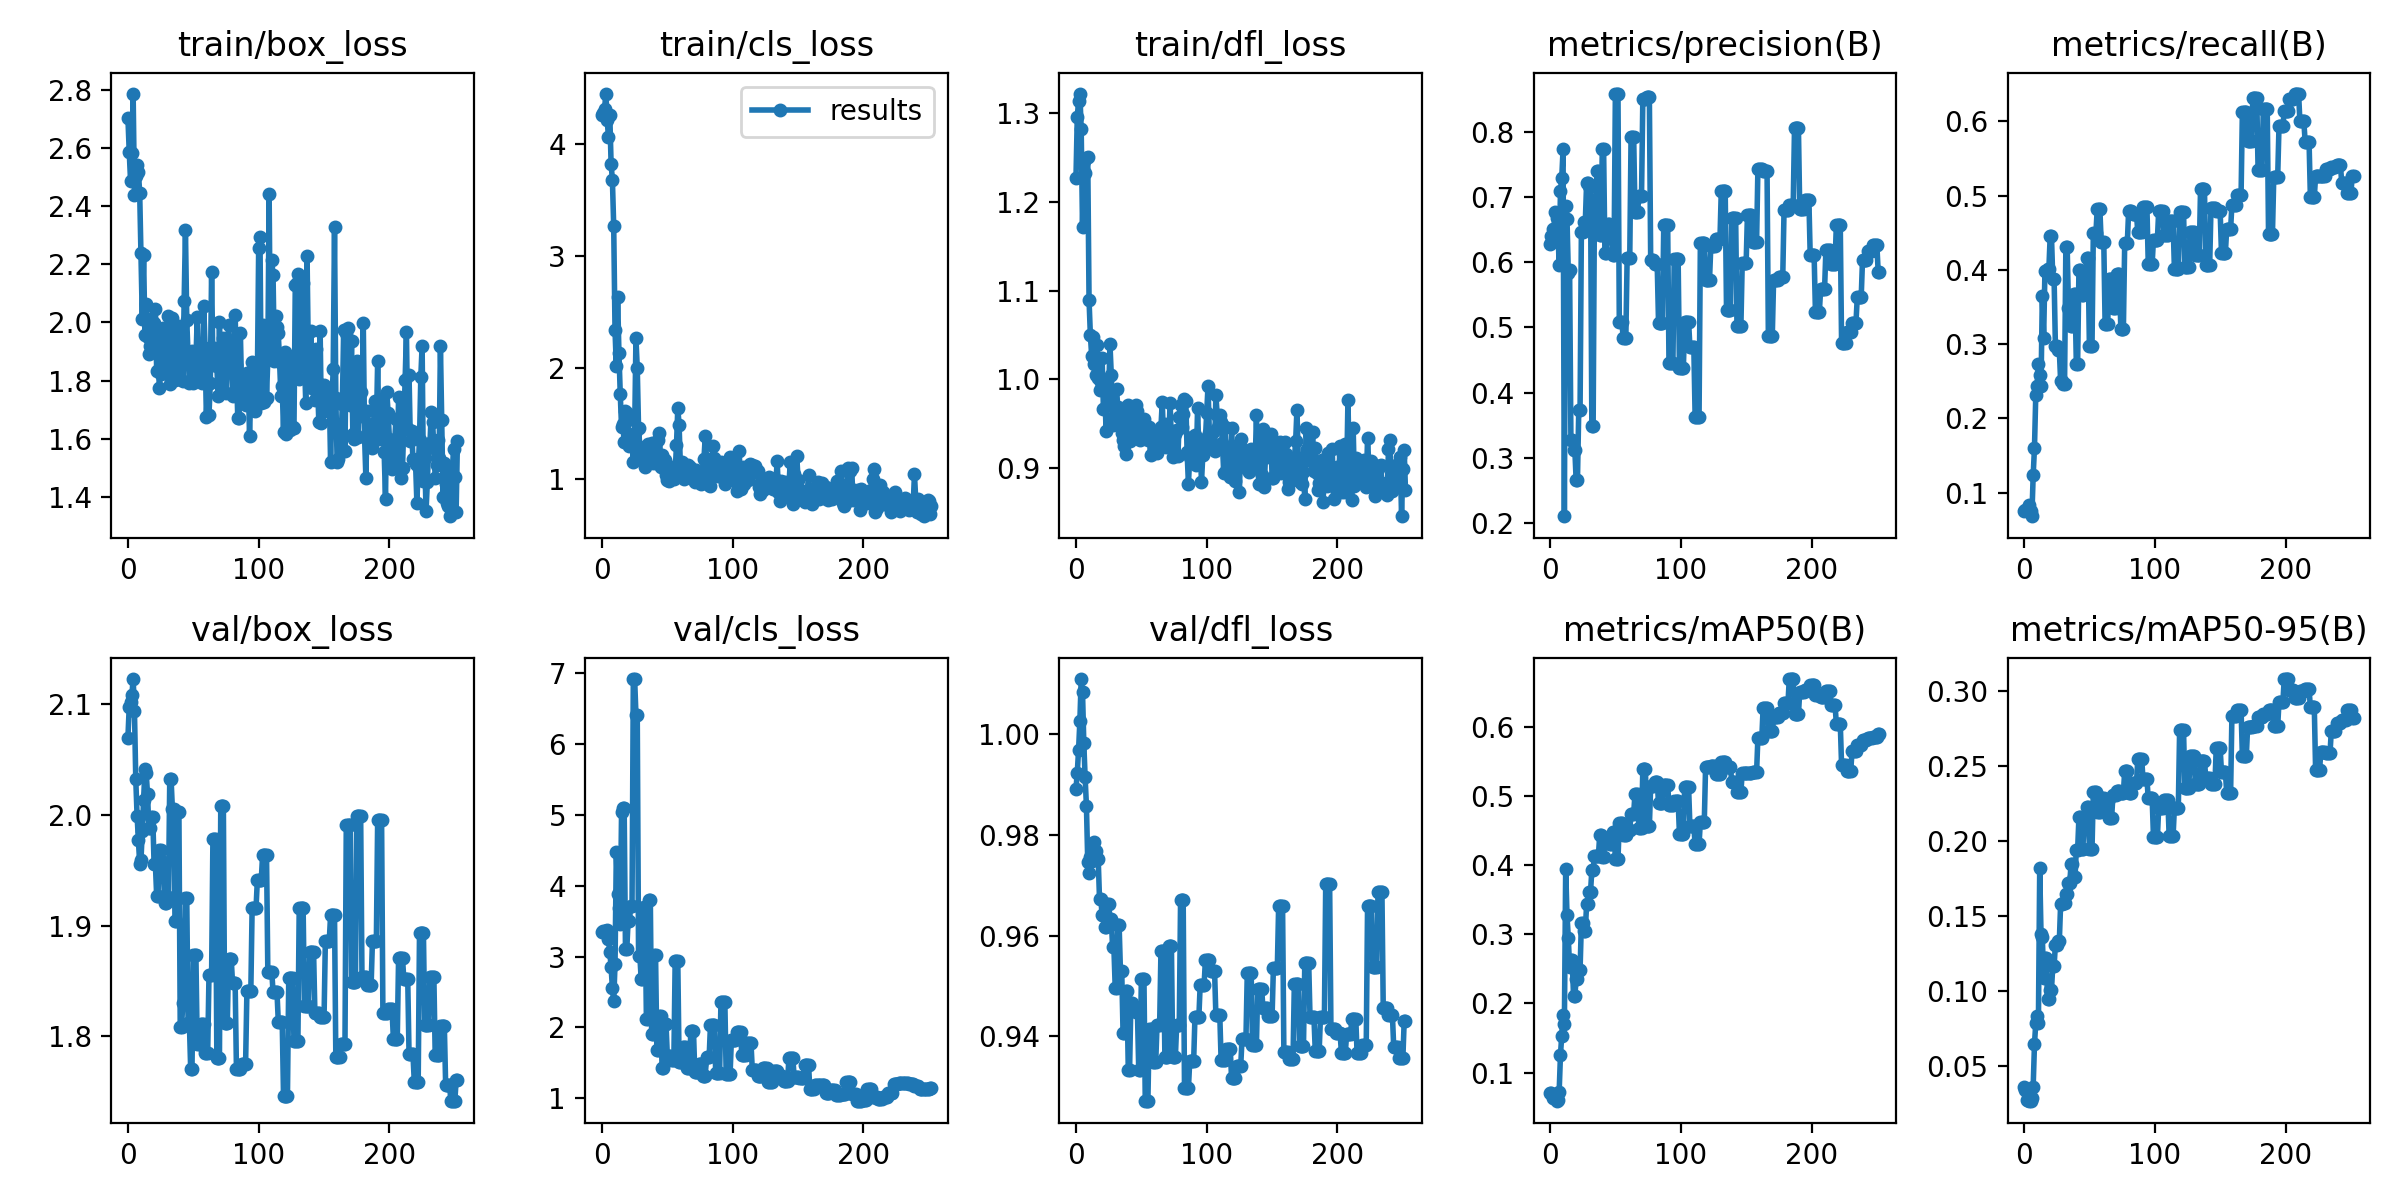

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=700)

## Validate the Model

The performance on the validation set is close to that on the training set. It seems there is no overfitting, and the model converges well.

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-08-03 09:31:00.139040: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-03 09:31:00.977211: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/MinneApple-floor-1/valid/labels.cache... 2 images, 0 backgrounds, 0 corrupt: 100% 2/2 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  2.77it/s]
                   all          2        142      0.609      0.608      0.667       0.31
                 apple          2      

## Inference with the Model

### Produce detection results

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-08-03 09:32:30.683575: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-03 09:32:31.498729: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
image 1/2 /content/datasets/MinneApple-floor-1/test/images/20150921_131346_image406_png_jpg.rf.dedebc2a87cccc0b5a5e1073c1b1415a.jpg: 736x416 72 apples, 32 apple_on_floors, 59.9ms
image 2/2 /content/datasets/MinneApple-floor-1/test/images/20150921_132245_image786_png_jpg.rf.21dc40a5062f340f5251cc6cafca4be9.jpg: 736x416 6 apples, 13 apple_on_floors, 13.7ms
Speed: 0.5ms pre-process, 36.8

**NOTE:** Let's take a look at few results.

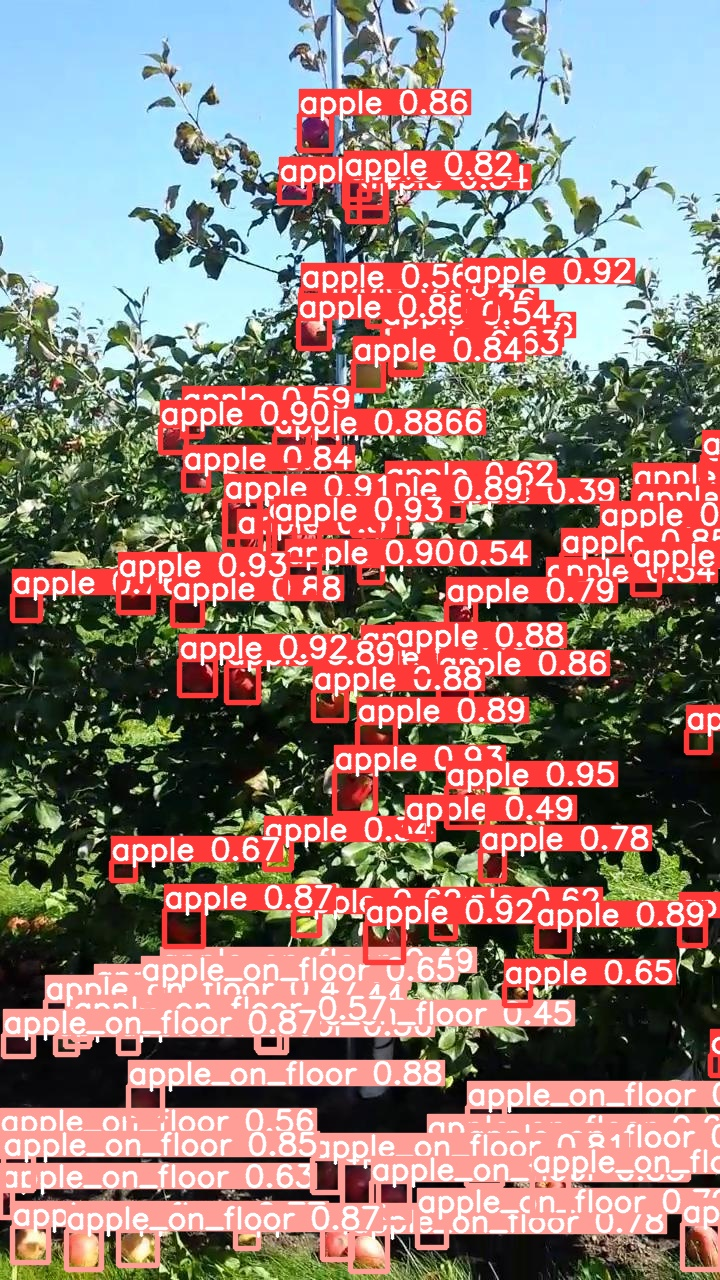

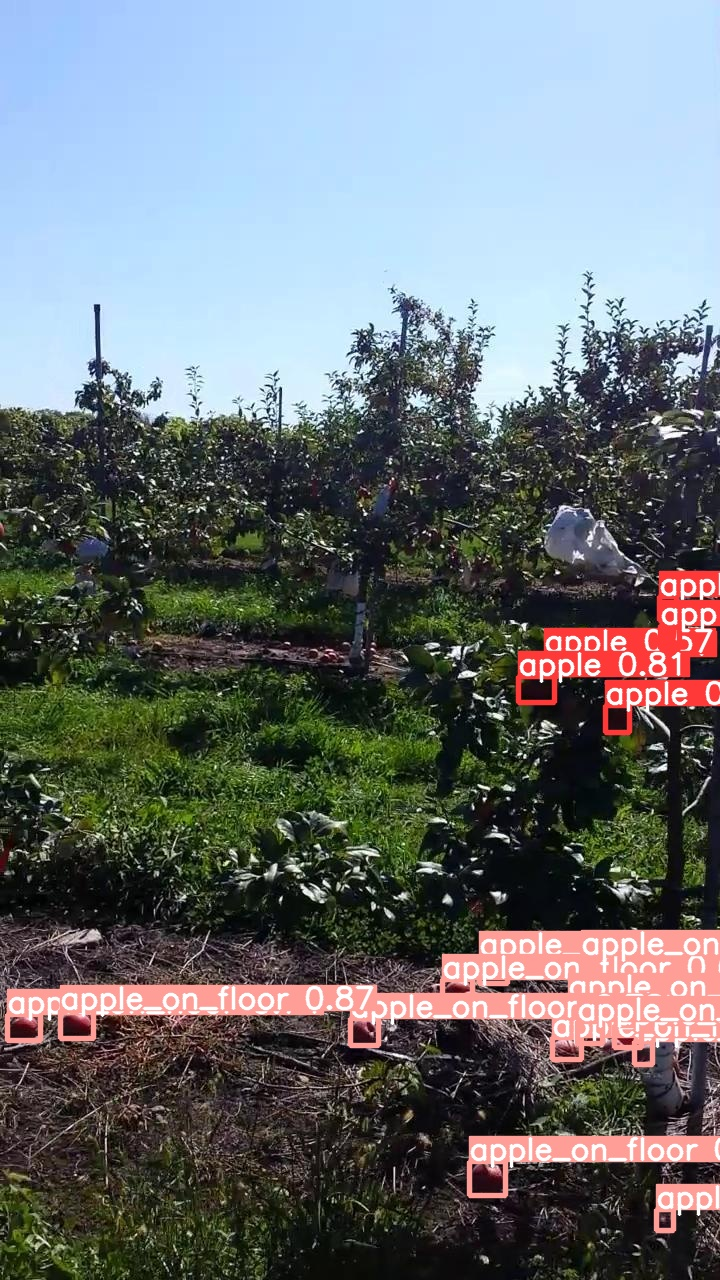

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=300))
      print("\n")

Produce the performance of the model on the test set.

Compared to the training results, the precision and mAP50-95 are close (~0.5%), but the recall is 2.1% higher and the mAP50 is 1.4% higher.

### Evaluate the model on test set


In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data_test.yaml

/content
2023-08-03 09:44:12.820793: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-03 09:44:13.656640: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/MinneApple-floor-1/test/labels... 2 images, 0 backgrounds, 0 corrupt: 100% 2/2 [00:00<00:00, 455.43it/s]
val: New cache created: /content/datasets/MinneApple-floor-1/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  2.86it/s]
                   all          2        100   

## Train the model

The training ends at 188th epoch as no improvement.

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=300 imgsz=720 plots=True  # 300


/content
100% 21.5M/21.5M [00:00<00:00, 72.9MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/MinneApple-floor-1/data.yaml, epochs=300, patience=50, batch=16, imgsz=720, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, ke

In [ ]:
!ls {HOME}/runs/detect/train/  # check the model is prodeced

args.yaml					    train_batch0.jpg
events.out.tfevents.1691053967.23ad01fec986.3141.0  train_batch1.jpg
results.csv					    train_batch2.jpg
results.png					    weights


In [ ]:
%cp {HOME}/runs/detect/train/weights/best.pt /content/gdrive/My\ Drive/Dissertation/Models
%cp {HOME}/runs/detect/train/results.png /content/gdrive/My\ Drive/Dissertation/Models
%cp {HOME}/runs/detect/train/confusion_matrix.png /content/gdrive/My\ Drive/Dissertation/Models
%cp {HOME}/runs/detect/train/val_batch0_pred.jpg /content/gdrive/My\ Drive/Dissertation/Models


cp: cannot stat '/content/runs/detect/train/confusion_matrix.png': No such file or directory
cp: cannot stat '/content/runs/detect/train/val_batch0_pred.jpg': No such file or directory


/content


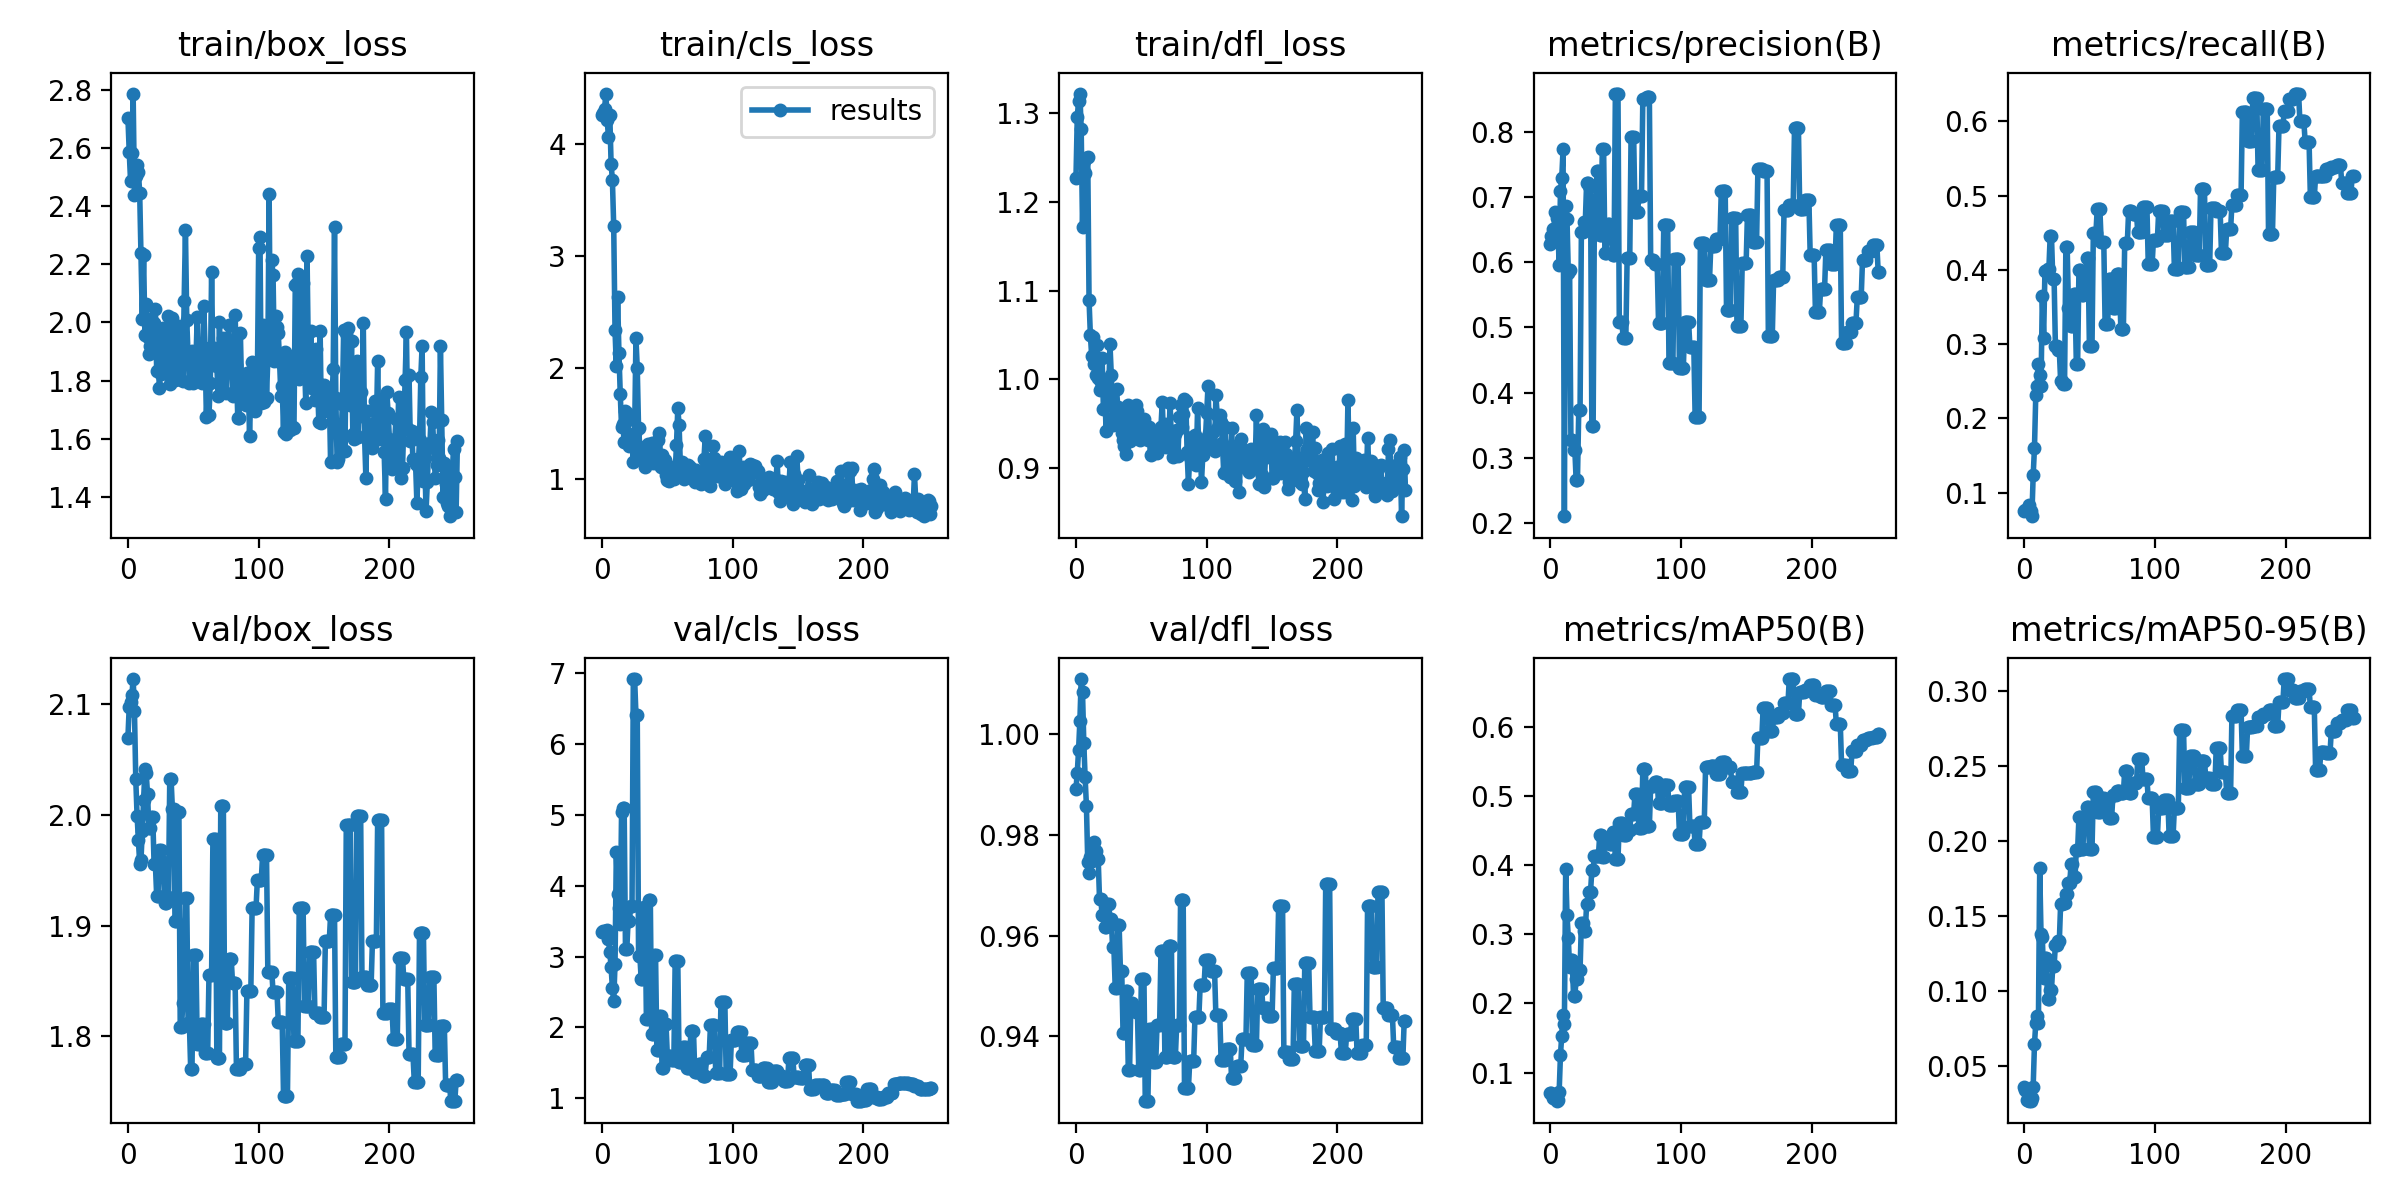

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=700)

## Validate the Model

The performance on the validation set is close to that on the training set. It seems there is no overfitting, and the model converges well.

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-08-03 09:31:00.139040: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-03 09:31:00.977211: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/MinneApple-floor-1/valid/labels.cache... 2 images, 0 backgrounds, 0 corrupt: 100% 2/2 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  2.77it/s]
                   all          2        142      0.609      0.608      0.667       0.31
                 apple          2      

## Inference with the Model

### Produce detection results

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-08-03 09:32:30.683575: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-03 09:32:31.498729: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
image 1/2 /content/datasets/MinneApple-floor-1/test/images/20150921_131346_image406_png_jpg.rf.dedebc2a87cccc0b5a5e1073c1b1415a.jpg: 736x416 72 apples, 32 apple_on_floors, 59.9ms
image 2/2 /content/datasets/MinneApple-floor-1/test/images/20150921_132245_image786_png_jpg.rf.21dc40a5062f340f5251cc6cafca4be9.jpg: 736x416 6 apples, 13 apple_on_floors, 13.7ms
Speed: 0.5ms pre-process, 36.8

**NOTE:** Let's take a look at few results.

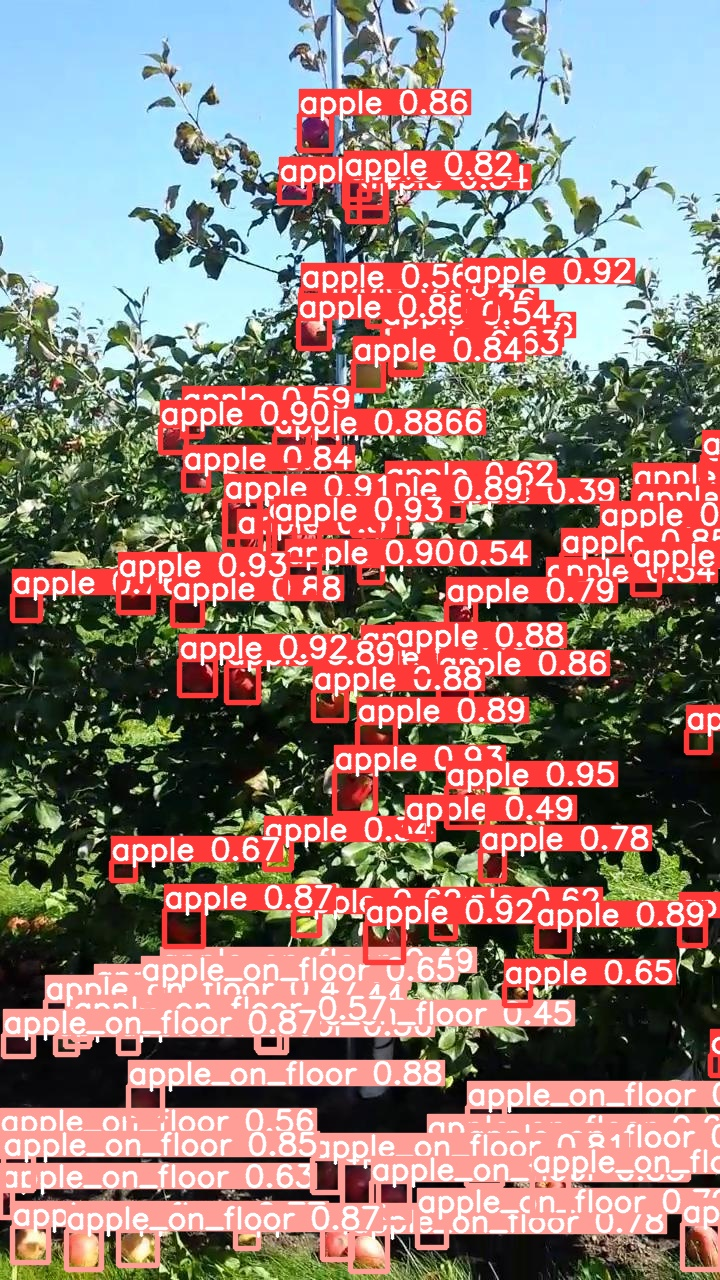

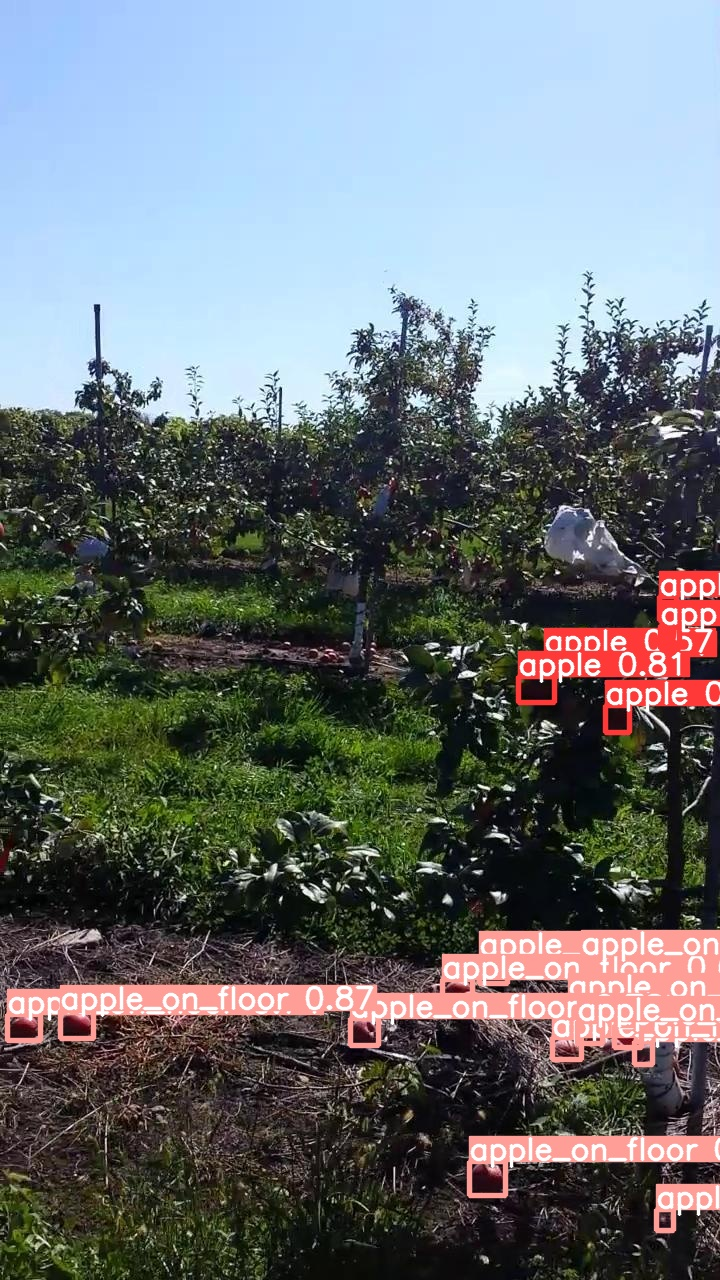

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=300))
      print("\n")

Produce the performance of the model on the test set.

Compared to the training results, the precision and mAP50-95 are close (~0.5%), but the recall is 2.1% higher and the mAP50 is 1.4% higher.

### Evaluate the model on test set


In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data_test.yaml

/content
2023-08-03 09:44:12.820793: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-03 09:44:13.656640: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/MinneApple-floor-1/test/labels... 2 images, 0 backgrounds, 0 corrupt: 100% 2/2 [00:00<00:00, 455.43it/s]
val: New cache created: /content/datasets/MinneApple-floor-1/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  2.86it/s]
                   all          2        100   

# Training on the augmented dataset

Download the augmented dataset.

Train:Val:Test = 22:2:2

In [16]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="lOVTQ88BgSlHqrup7AYi")
project = rf.workspace("dissertation-bqltf").project("minneapple-floor-set")
dataset = project.version(3).download("yolov8")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`


Extracting Dataset Version Zip to MinneApple-floor-set-3 in yolov8:: 100%|██████████| 186/186 [00:00<00:00, 2370.72it/s]


## Train the model

In [21]:
import torch
torch.cuda.empty_cache()

The training ends at 188th epoch as no improvement.

In [23]:
%cd {HOME}

# !yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=300 imgsz=720 plots=True  # 300

# !yolo task=detect mode=train model={HOME}/gdrive/My\ Drive/Dissertation/Models/ori_best.pt data={dataset.location}/data.yaml epochs=300 imgsz=720 batch=4 plots=True  # 300

# !yolo task=detect mode=train model={HOME}/runs/detect/train5/weights/last.pt data={dataset.location}/data.yaml epochs=600 imgsz=720 batch=8 plots=True patience=200  # 251/600

# !yolo task=detect mode=train model={HOME}/gdrive/My\ Drive/Dissertation/Models/ori_best.pt data={dataset.location}/data.yaml epochs=2000 imgsz=720 batch=8 plots=True patience=500

### 45:5:5
!yolo task=detect mode=train model={HOME}/gdrive/My\ Drive/Dissertation/Models/ori_best.pt data={dataset.location}/data.yaml epochs=2000 imgsz=720 batch=8 plots=True patience=300



Streaming output truncated to the last 5000 lines.

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   947/2000      12.2G     0.7556     0.3738     0.7925        396        736: 100% 10/10 [00:07<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  2.57it/s]
                   all          6        477      0.918      0.872      0.923      0.595
                 apple          6        257      0.933      0.879      0.932      0.628
        apple_on_floor          6        220      0.903      0.864      0.913      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   948/2000      12.2G     0.7085     0.3588     0.7909        366        736: 100% 10/10 [00:06<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  2.32it/s]
                   all          6        477  

In [18]:
!ls {HOME}/runs/detect/train/  # check the model is prodeced

args.yaml					    train_batch0.jpg  weights
events.out.tfevents.1691094424.025b66a59172.9867.0  train_batch1.jpg
results.csv					    train_batch2.jpg


In [24]:
%cp {HOME}/runs/detect/train4/weights/best.pt /content/gdrive/My\ Drive/Dissertation/Models
%cp {HOME}/runs/detect/train4/results.png /content/gdrive/My\ Drive/Dissertation/Models
# %cp {HOME}/runs/detect/train2/confusion_matrix.png /content/gdrive/My\ Drive/Dissertation/Models
# %cp {HOME}/runs/detect/train2/val_batch0_pred.jpg /content/gdrive/My\ Drive/Dissertation/Models


/content


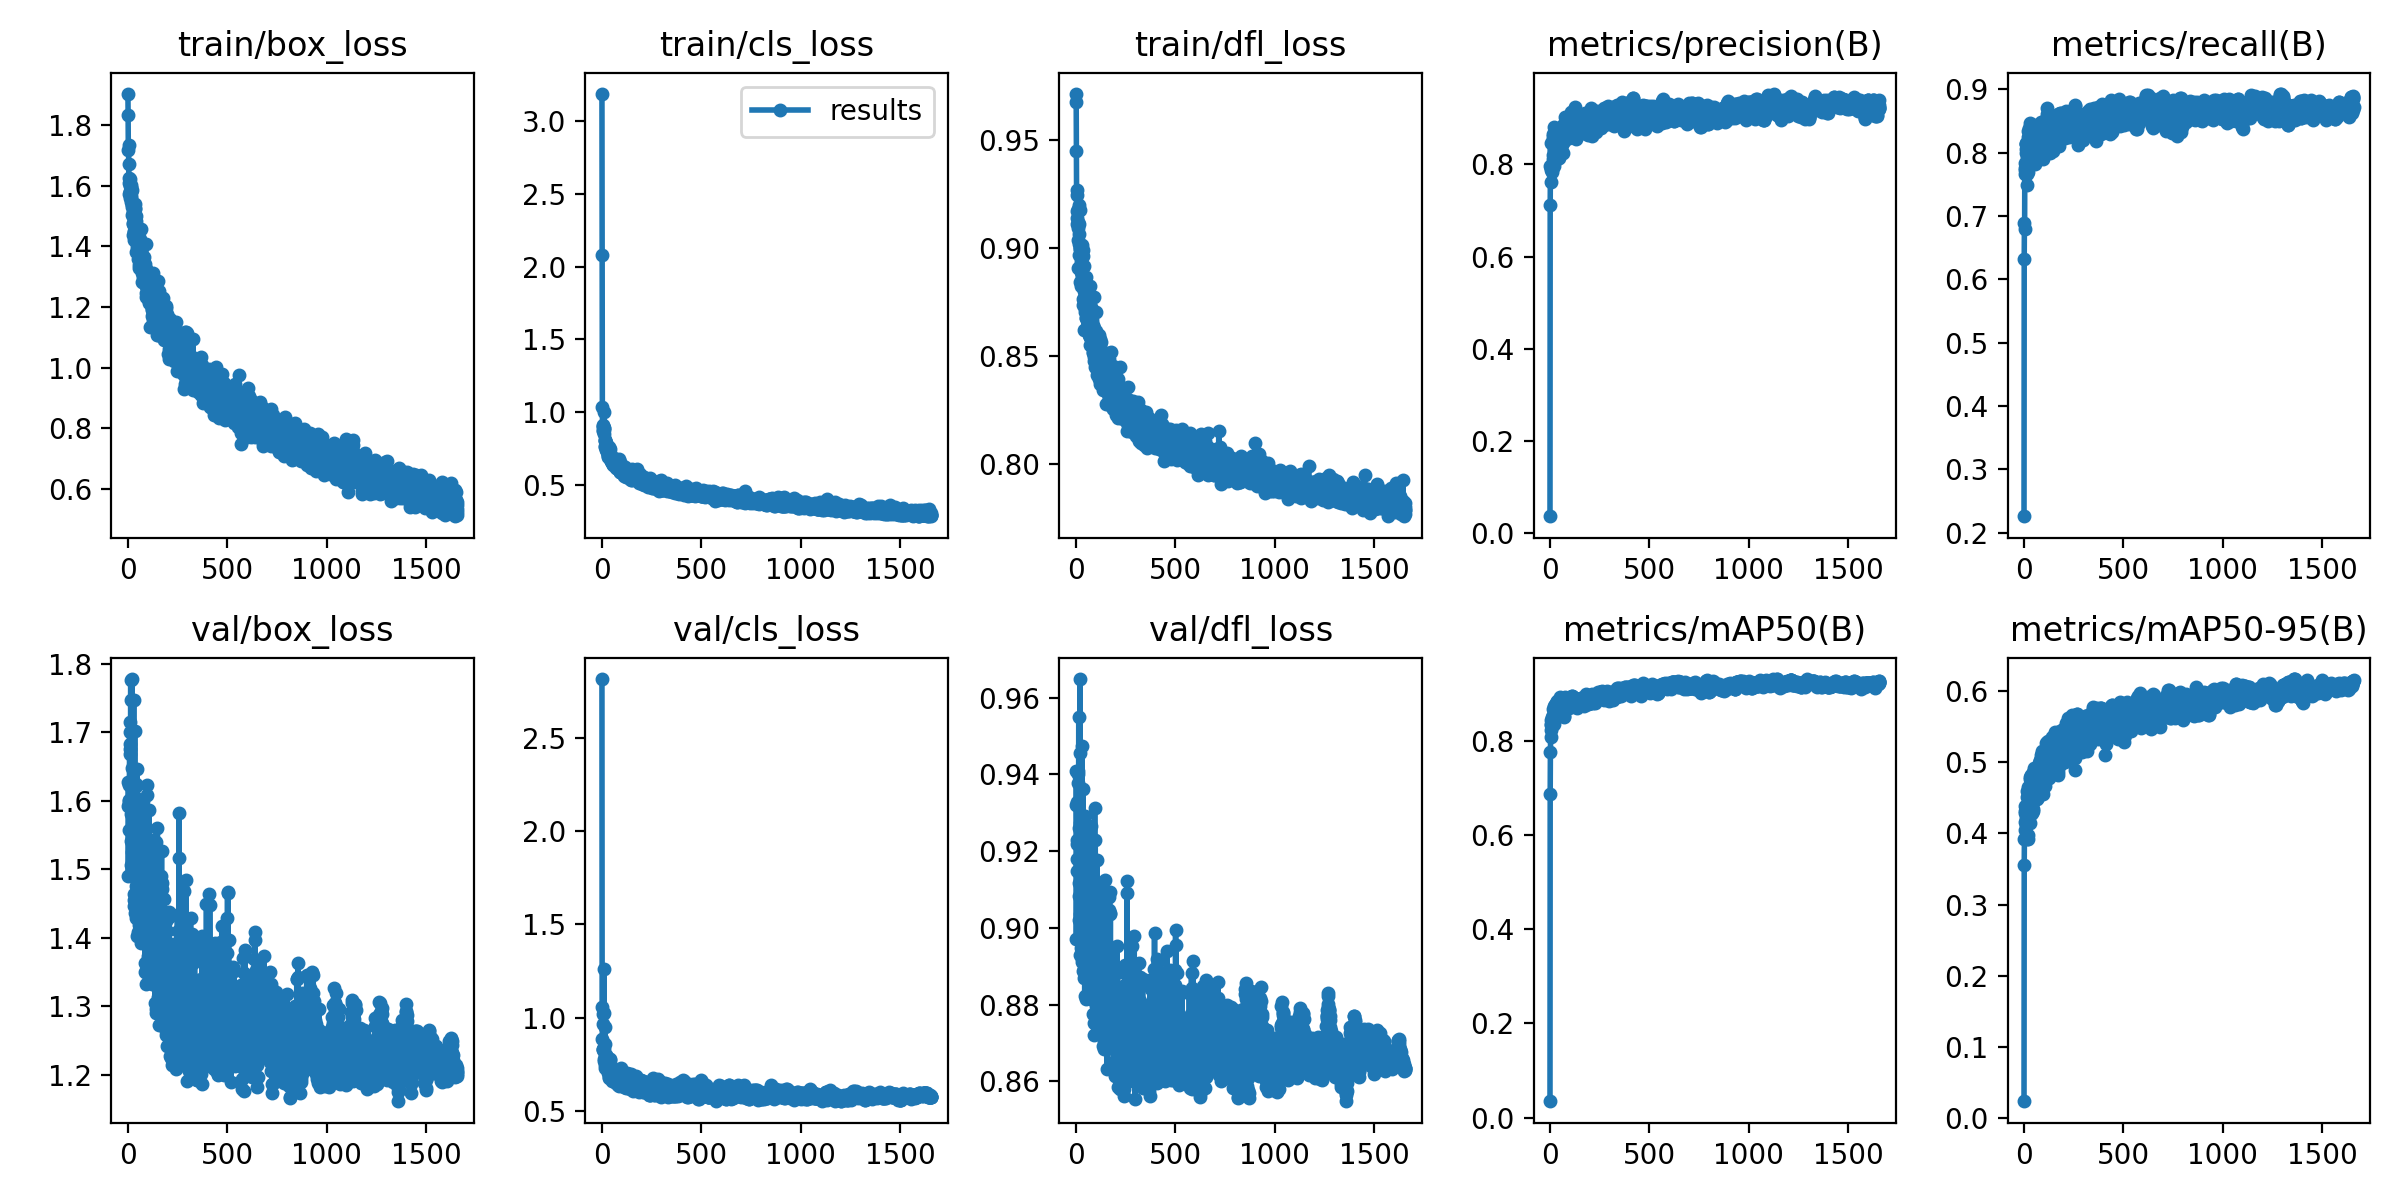

In [25]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/results.png', width=700)

## Validate the Model

The performance on the validation set is close to that on the training set. It seems there is no overfitting, and the model converges well.

In [26]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train4/weights/best.pt data={dataset.location}/data.yaml

/content
2023-08-04 00:29:23.721391: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-04 00:29:24.601355: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/MinneApple-floor-set-3/valid/labels.cache... 6 images, 0 backgrounds, 0 corrupt: 100% 6/6 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.42it/s]
                   all          6        477      0.934       0.86      0.925       0.62
                 apple     

## Inference with the Model

### Produce detection results

In [27]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train4/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-08-04 00:29:45.779583: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-04 00:29:46.616237: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
image 1/6 /content/datasets/MinneApple-floor-set-3/test/images/20150919_174151_image161_png-_jpg.rf.7b5f99bfec0a2c64b48381f25a5b4cbd.jpg: 736x416 118 apples, 4 apple_on_floors, 62.7ms
image 2/6 /content/datasets/MinneApple-floor-set-3/test/images/20150921_131234_image476_png-_jpg.rf.001b02823d56c21f242e7055d01b3db8.jpg: 736x416 63 apples, 26 apple_on_floors, 13.4ms
image 3/6 /

**NOTE:** Let's take a look at few results.

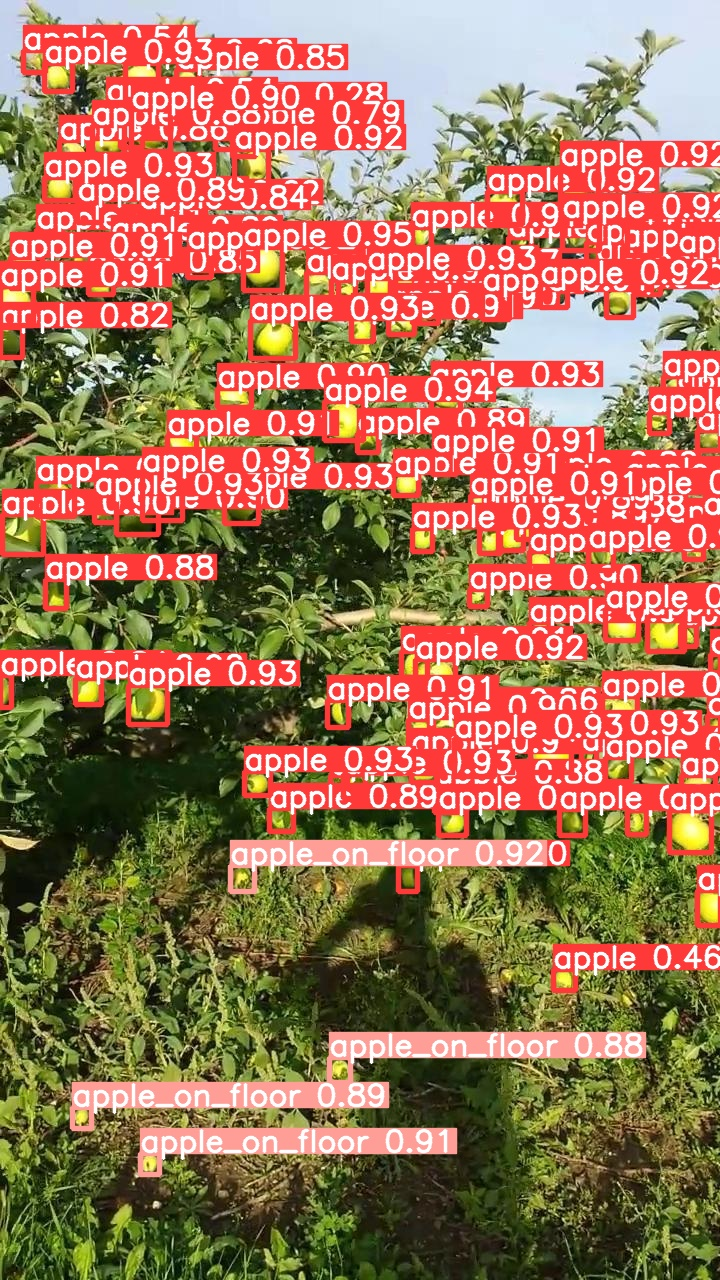

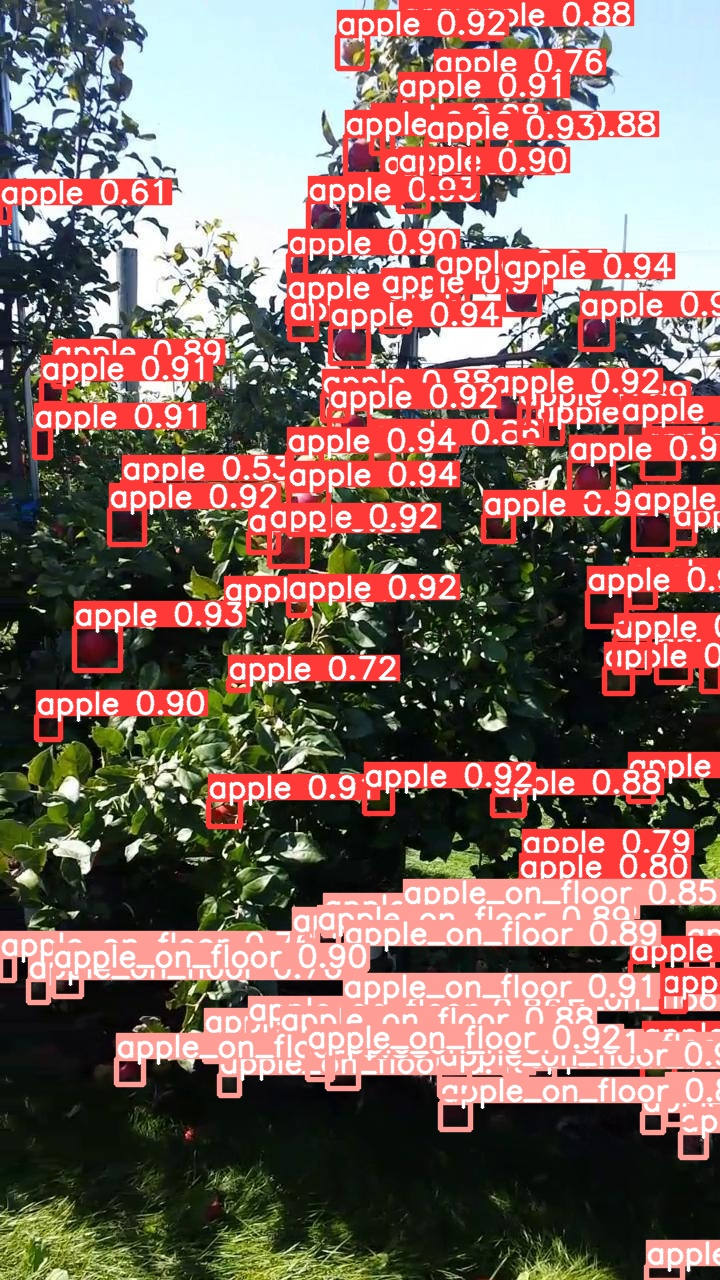

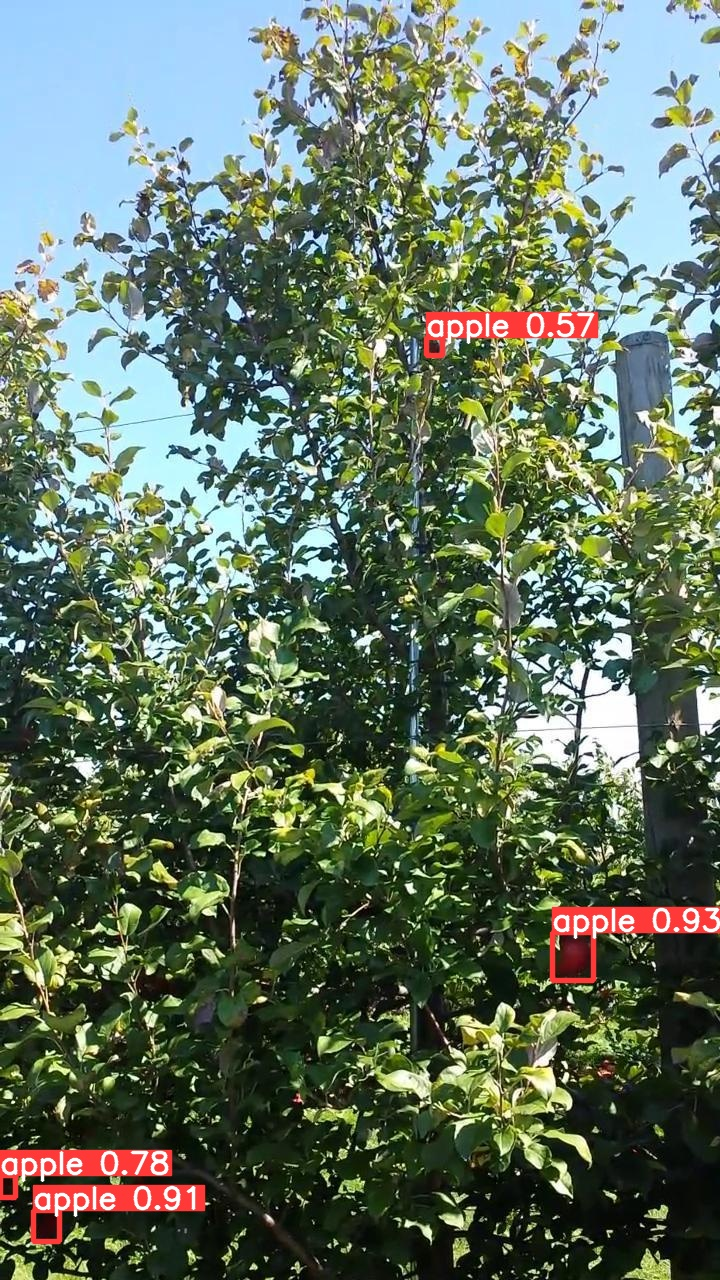

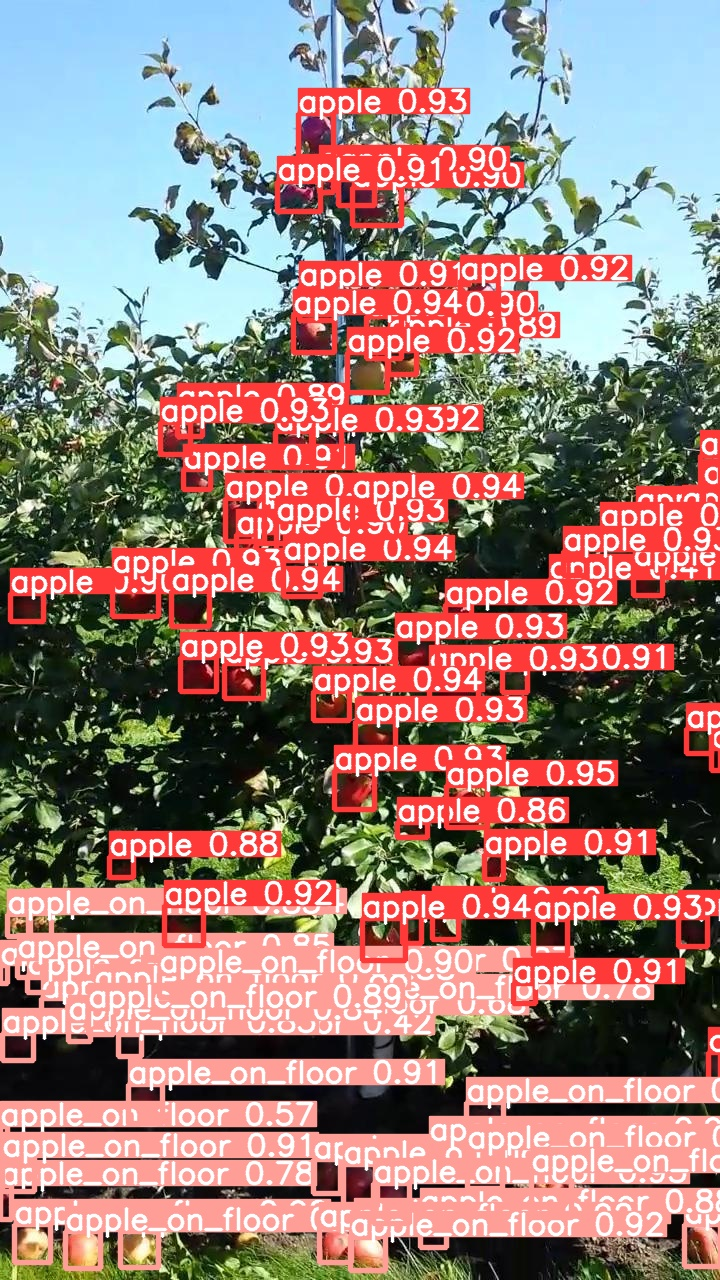

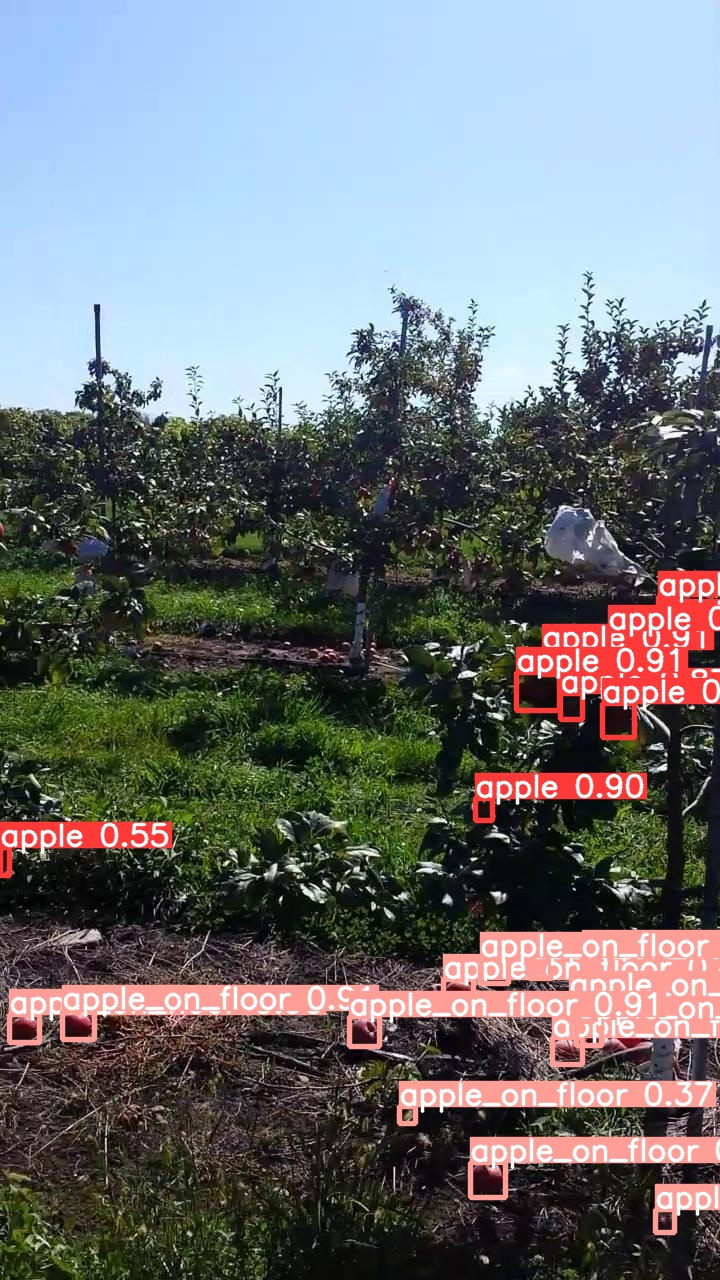

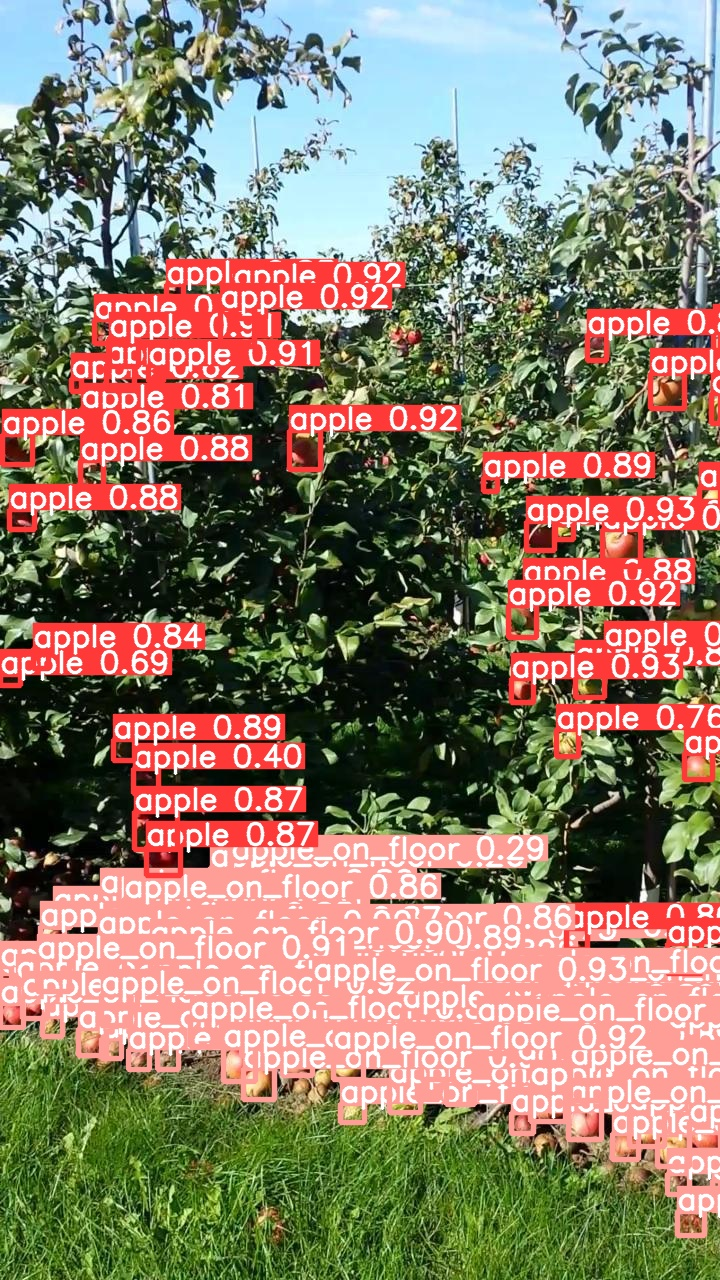

In [31]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:6]:
      display(Image(filename=image_path, width=600))
      print("\n")

Produce the performance of the model on the test set.

Compared to the training results, the precision and mAP50-95 are close (~0.5%), but the recall is 2.1% higher and the mAP50 is 1.4% higher.

### Evaluate the model on test set


In [30]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train4/weights/best.pt data={dataset.location}/data_test.yaml

/content
2023-08-04 00:32:14.714241: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-04 00:32:15.571120: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/MinneApple-floor-set-3/test/labels... 6 images, 0 backgrounds, 0 corrupt: 100% 6/6 [00:00<00:00, 484.90it/s]
val: New cache created: /content/datasets/MinneApple-floor-set-3/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.39it/s]
                   all         